# Practicum Data Augmentation

## Imports

In [14]:
# Voeg imports toe als je ze nodig hebt
import pandas as pd
import torchvision
import matplotlib.pyplot as plt
import os

## Bronnen

EuroSAT project: https://github.com/phelber/eurosat

Pytorch Vision: https://pytorch.org/vision/stable/index.html

## Context

De hoeveelheid data is vaak de beperkende factor in machine learning met convolution neural nets (CNN). In dit practicum vergroten we de EuroSAT dataset kunstmatig, zodat ons CNN meer variatie ziet om van te leren.

## Opdrachten

### Opdracht 1: dataset downloaden

Download de EuroSAT_RGB dataset.

Zie https://zenodo.org/record/7711810#.ZAm3k-zMKEA voor de beschrijving.

In [ ]:
# Extra: kun je de dataset ook met python downloaden?

# Hint: gebruik de requests module

### Opdracht 2: dataset inspecteren

Unzip de EuroSAT_RGB.zip in de folder van dit notebook (. path) en bekijk de inhoud.

In [ ]:
# Extra: kun je de dataset ook met python unzippen?

# Hint: gebruik de zipfile module

### Opdracht 3: afbeelding inladen

PyTorch Vision maakt het inladen van afbeeldingen gemakkelijk via:

https://pytorch.org/vision/stable/io.html

In [62]:
# a. Localiseer de afbeelding 'Industrial_1.jpg'

# b. Wat is het relative pad van 'Industrial_1.jpg'?

# c. Bekijk de documentatie van de PyTorch io module

# d. Laad de afbeelding 'Industrial_1.jpg' in (variable 'industrial')
industrialDirectory = '../../01. Beeldherkenning/practica/pics/2750/Industrial'

industrial = torchvision.io.read_image(f'{industrialDirectory}/Industrial_1.jpg', ImageReadMode.UNCHANGED)

print(industrial)


tensor([[[ 46,  48,  48,  ..., 223, 158, 102],
         [ 45,  48,  48,  ..., 226, 158, 102],
         [ 44,  45,  47,  ..., 216, 141,  98],
         ...,
         [ 85,  86,  95,  ...,  89,  94,  95],
         [ 66,  66,  71,  ...,  80,  89,  93],
         [ 66,  66,  73,  ...,  85,  91,  92]],

        [[ 80,  79,  77,  ..., 221, 156, 103],
         [ 81,  79,  77,  ..., 220, 156, 104],
         [ 80,  79,  78,  ..., 206, 140, 102],
         ...,
         [ 93,  93,  98,  ...,  98, 101,  97],
         [ 81,  81,  81,  ...,  91,  98,  97],
         [ 86,  85,  87,  ...,  93, 100,  98]],

        [[ 79,  81,  81,  ..., 224, 169, 121],
         [ 79,  81,  81,  ..., 224, 167, 119],
         [ 78,  80,  80,  ..., 214, 148, 113],
         ...,
         [104, 103, 105,  ..., 105, 109, 109],
         [ 84,  88,  90,  ...,  95, 105, 109],
         [ 84,  89,  96,  ...,  95, 105, 110]]], dtype=torch.uint8)


### Opdracht 4: afbeelding tonen

PyTorch Vision maakt ook het tonen van afbeeldingen gemakkelijk.

torch.Size([3, 64, 64])


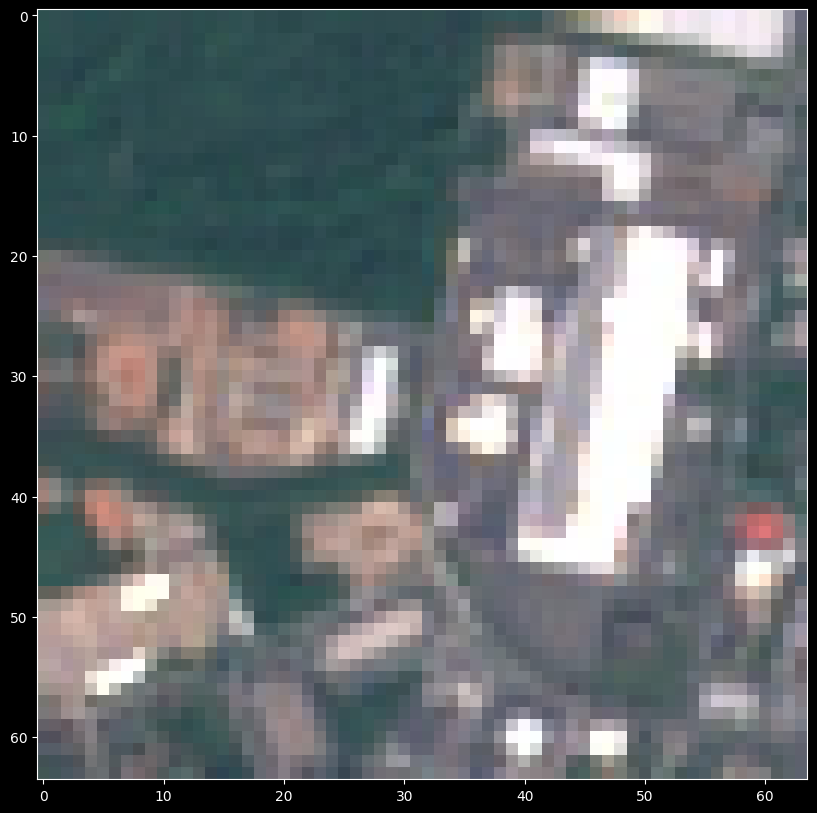

In [63]:
# a. Bekijk het overzicht op https://pytorch.org/vision/stable/index.html

# b. Kun je iets vinden waarmee je een afbeelding kunt tonen?

# c. Toon de afbeelding 'Industrial_1.jpg'

# Use plt.imshow(image) to show image -> use .permute(1,2,0) to change the shape of the tensor (from [3,64,64] to [64,64,3]) so imshow() can read it.
print(industrial.shape)
plt.imshow(industrial.permute(1,2,0))


### Opdracht 5: afbeelding bewerken

Ook augmentatie maakt PyTorch Vision makkelijk.

Normal     : torch.Size([3, 64, 64])
Resize (2x): torch.Size([3, 128, 128])
Gray       : torch.Size([1, 128, 128])


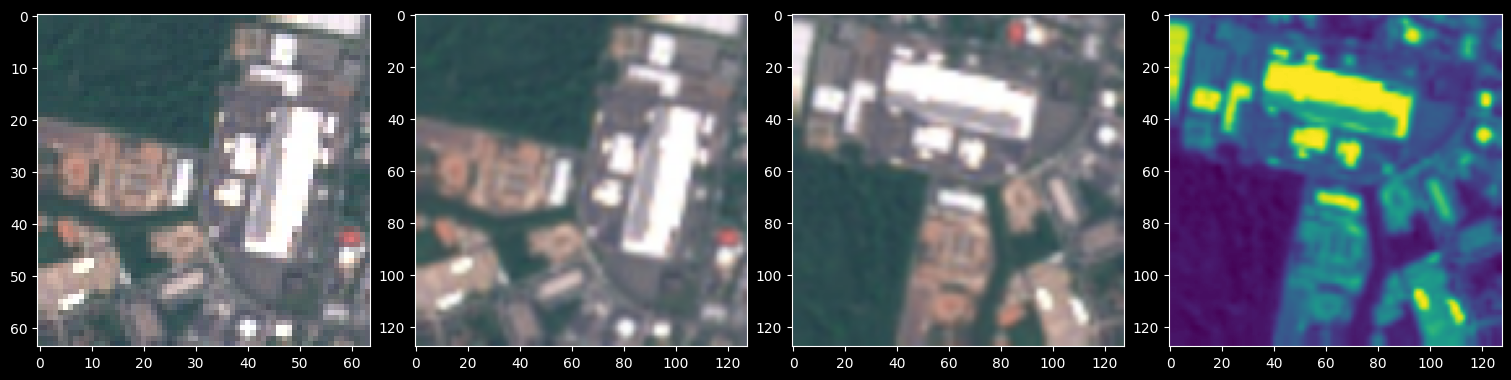

In [75]:
# a. Welke module is bedoeld voor het bewerken van afbeeldingen?

# b. Schaal de afbeelding op naar 2x de originele grootte (variable 'industrial_2x')
resize = torchvision.transforms.Resize((128,128))
industrial_2x = resize(industrial)

# c. Voer een willekeurige rotatie uit op de vergrote afbeelding (variable 'industrial_2x_rot')
# Gebtuik torchvision.transforms.RandomRotation() voer sequence van 2 waardes in (min, max) waar de functie een random grade uit kiest.
rotate = torchvision.transforms.RandomRotation((90,90))
industrial_2x_rot = rotate(industrial_2x)

# d. Converteer de bewerkte afbeelding naar grijstinten (variable 'industrial_2x_rot_gray')
decolor = torchvision.transforms.Grayscale(1)
industrial_2x_rot_gray = decolor(industrial_2x_rot)

# e. Sla de bewerkte afbeeldingen op
torchvision.io.write_jpeg(industrial,filename="../Practicum/Industrial.jpeg")
torchvision.io.write_jpeg(industrial_2x,filename="../Practicum/Industrial_2x.jpeg")
torchvision.io.write_jpeg(industrial_2x_rot,filename="../Practicum/Industrial_2x_rot.jpeg")
torchvision.io.write_jpeg(industrial_2x_rot_gray,filename="../Practicum/Industrial_2x_rot_gray.jpeg")

# f. Toon alle varianten in een grid
print(f"Normal     : {industrial.shape}")
print(f"Resize(2x) : {industrial_2x.shape}")
print(f"Gray       : {industrial_2x_rot_gray.shape}")

def plotImgs(img1,img2,img3,img4):
    plt.style.use('dark_background') 
    plt.rcParams["font.size"] = 10
    plt.rcParams["figure.figsize"] = (15, 10)

    fig, (axL, axL2, axR, axR2) = plt.subplots(ncols=4, constrained_layout=True)
    
    imL = axL.imshow(img1.permute(1,2,0))
    imR = axL2.imshow(img2.permute(1,2,0))
    im3 = axR.imshow(img3.permute(1,2,0))
    im4 = axR2.imshow(img4.permute(1,2,0))

plotImgs(industrial,industrial_2x,industrial_2x_rot,industrial_2x_rot_gray)





### Reflectie

Zijn alle transformaties zinnig voor deze dataset?

torch.Size([3, 64, 64])
torch.Size([3, 186, 186])


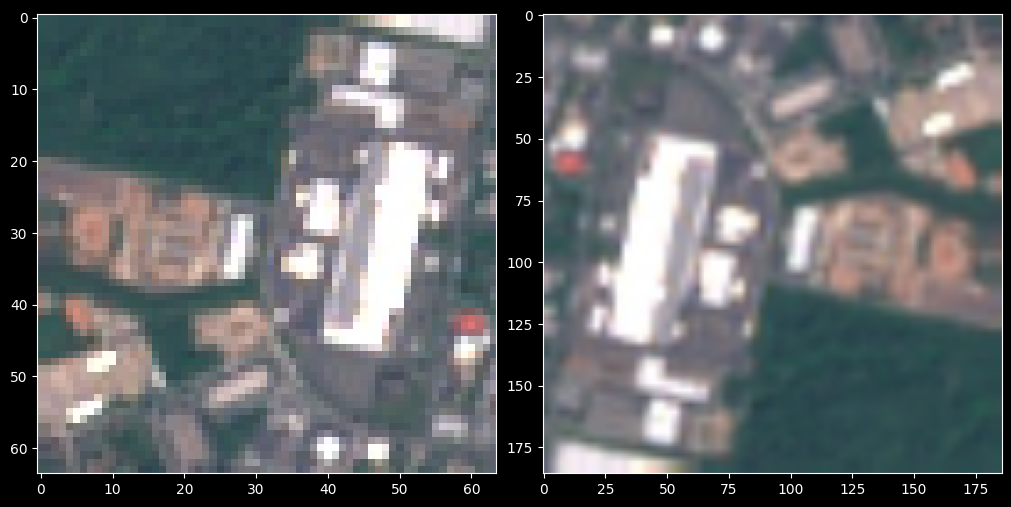

In [80]:
# Extra: Je kunt alle acties ook bundelen, zie: https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose

# a. Probeer nog een aantal transformaties uit en bundel ze als 1 tranformatie

def plotImgs2(lImg, rImg):
    plt.style.use('dark_background') 
    plt.rcParams["font.size"] = 10
    plt.rcParams["figure.figsize"] = (10, 7)

    fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
    
    imL = axL.imshow(lImg.permute(1, 2, 0))
    imR = axR.imshow(rImg.permute(1, 2, 0))

transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((192,192)),
    torchvision.transforms.RandomRotation((180,180))  
])

industrial_transforms = transforms(industrial)

print(industrial.shape)
print(industrial_transforms.shape)

plotImgs2(industrial, industrial_transforms)

### Opdracht 6: batch bewerkingen

Tot nu toe hebben we een enkele afbeelding bewerkt.

In [ ]:
# Generaliseer de bovenstaande stappen en batch-bewerk de Industrial folder

transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((128,128)),
    torchvision.transforms.RandomRotation((180,180)),
    torchvision.transforms.Grayscale(1)
])

